# Foundations of Data Mining: Assignment 3


Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

 **Deadline:** Thursday, March 29,  2018

In [ ]:
# Please fill in your names here
NAME_STUDENT_1 = "Robin Esposito"
NAME_STUDENT_2 = "Matej Grobelnik"

In [4]:
%matplotlib inline
from preamble import *

import sklearn.decomposition as deco
import sklearn.manifold as manifold

plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
#InteractiveShell.ast_node_interactivity = "all" 

## PCA and Isomap (5 Points, 1+2+2)

Apply PCA and Isomap to images of handwritten digits (see below). You may use sklearn.decomposition and sklearn.manifold.

### a)  
Compute the first two components of the data using PCA. Make a scatter plot of the data in the first two components of PCA indicating class with color.

### b)
 Compute an Isomap embedding with two components with nr_neighbors={5, 50, N-1} (three separate embeddings).
 For each of the Isomap embeddings, apply the function "align" (see below) with "ref_data" as your computed pca embedding and "data" as the isomap embedding. Show a scatter plot of each of the aligned isomap embeddings.
 
### c)

Visually compare how well the classes are separated in the different scatter plots. What is the effect of changing the number of neighbors on the score computed in the alignment function? What does it mean if the score is zero? When do you expect the score to become zero and why?


In [11]:
# Load the data set
from sklearn import datasets
from sklearn.manifold import Isomap
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
N=len(X)

# Align a data set with a reference data set minimizing l_1 error
# Returns aligned data set and alignment error
def align(ref_data, data):
    
    transformations = np.asarray([
        [[0,1],[1,0]], 
        [[0,-1],[1,0]], 
        [[0,1],[-1,0]], 
        [[0,-1],[-1,0]], 
        [[1,0],[0,1]], 
        [[1,0],[0,-1]], 
        [[-1,0],[0,1]], 
        [[-1,0],[0,-1]] 
    ])
    
    score = []
    for i in range(0,8):
        transf_data =   np.matmul(data, transformations[i])
        score.append(np.linalg.norm( transf_data - ref_data, ord=1) )
        
    idx = np.argmin(score)
    transf_data = np.matmul(data,transformations[idx])
    
    print("Aligned the data sets. Score is {0:10.1f}  ".format(score[idx]))
    
    return transf_data, score[idx]


### a) 

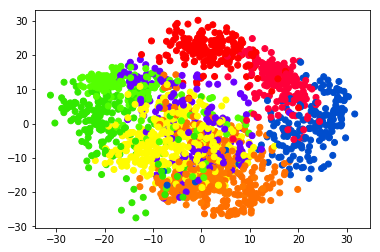

In [18]:
pca = deco.PCA(n_components=2).fit_transform(X)
y.tolist()
plt.scatter(pca[:,0], pca[:,1], c=y, cmap=plt.cm.prism)

### b) 

Aligned the data sets. Score is   102234.2  
Aligned the data sets. Score is    31067.5  
Aligned the data sets. Score is        0.0  


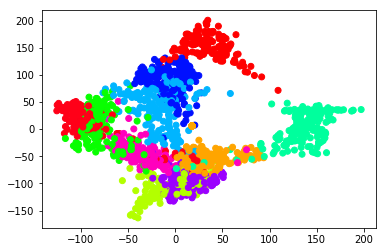

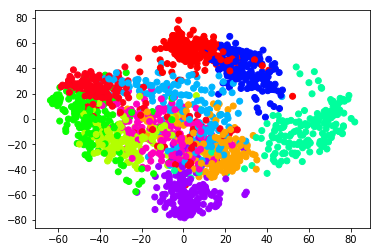

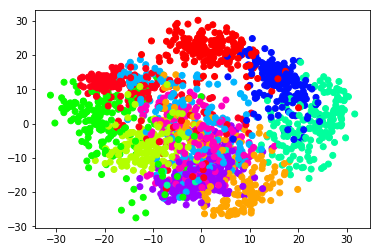

In [19]:
n = [5, 50, len(y)-1]

for i in n:
    isomap = Isomap(i, 2)
    iso, score = align(pca, isomap.fit_transform(X))
    plt.figure()
    plt.scatter(iso[:,0], iso[:,1], c=y, cmap=plt.cm.hsv)

### c) 

We observed that the best separation of classes is by using 5 neighbours. When we increased the number of neighbours, the separation got worse. The score calculates max(sum(abs(transformed data-reference data))) over the columns. When increasing the number of neighbours, the score gets lower. When the score is 0 then there is no difference in between both datasets. This means that isomap with two components computed with N-1 neighbours is equal to the first 2 principal components. By taking N-1 as the number of neighbours, we lose the manifold assumption and thus compute the principal components.

## Classical Multidimensional Scaling (6 Points, 1+2+2+1)

Show that for mean-centered data sets we can recover inner products using
pairwise distance information only. This is used by the isomap embedding algorithm.

We are given all squared pairwise distances of an otherwise unknown
point set ${\bf p}_1,\dots, {\bf p}_n \in \mathbb{R}^d$, i.e., we are given 
for all $1 \leq i,j \leq n$ the values

$$  d_{ij} = \|{\bf p}_i - {\bf p}_j\|^2. $$

We assume that the point set is mean-centered, that is 

$$ \sum_{i=1}^{n} {\bf p}_i = \vec{{\bf 0}}.$$

(where $\vec{{\bf 0}}$ is the vector of zeros)


In the following, $\langle {\bf p}_i , {\bf p}_j \rangle$ denotes the inner 
product of ${\bf p}_i$ and ${\bf p}_j$. 
Prove that the following holds true for mean-centered point sets: 

$$-2 \langle {\bf p}_i , {\bf p}_j \rangle = 
d_{ij}
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2} 
$$

You may use the following steps in your derivation.

### a) 
Expand  $d_{ij}$ to yield an expression of $\langle {\bf p}_i, {\bf p}_j \rangle$, $\|{\bf p}_i\|^2$ and $\|{\bf p}_j\|^2$.

**Answer:**

$$d_{ij}=\|{\bf p}_i - {\bf p}_j\|^2=\langle {\bf p}_i-{\bf p}_j, {\bf p}_i-{\bf p}_j \rangle=\langle {\bf p}_i, {\bf p}_i \rangle-\langle {\bf p}_i, {\bf p}_j \rangle-\langle {\bf p}_j, {\bf p}_i \rangle+\langle {\bf p}_j, {\bf p}_j \rangle=\|{\bf p}_i\|^2-2\langle {\bf p}_i, {\bf p}_j \rangle+\|{\bf p}_j\|^2$$



### b) 
Show that the following holds for any $ {\bf q} \in \mathbb{R}^d$:
$$ \sum_{1 \leq i \leq n} \langle {\bf p}_i , {\bf q} \rangle =   0$$

**Answer:**

$ \sum_{i=1}^{n} {\bf p}_i = \vec{{\bf 0}}$  implies that for all $1 \leq j \leq d$ we will have $ \sum_{i=1}^{n} {\mbox p}_{ij} = 0$.

Therefore, for any $ {\bf q} \in \mathbb{R}^d$:

$$ \sum_{i=1}^{n} \langle {\bf p}_i , {\bf q} \rangle = \sum_{i=1}^{n} \sum_{j=1}^{d} ( {\mbox p}_{ij} \cdot {\mbox q}_j ) =  \sum_{j=1}^{d} ( {\mbox q}_j \cdot \sum_{i=1}^{n} {\mbox p}_{ij} ) = \sum_{j=1}^{d} ( {\mbox q}_j \cdot 0 ) = 0 $$



### c) 
Prove that 
$$ \|{\bf p}_i\|^2 = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$$


**Answer:**

We will prove this point starting from the right-hand side of the equation.

$$ \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2} = $$

$$ = \sum_{\ell=1}^{n} \frac{\|{\bf p}_i - {\bf p}_\ell\|^2}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{\|{\bf p}_k - {\bf p}_\ell\|^2}{2n^2} = $$

$$ = \sum_{\ell=1}^{n} \frac{\|{\bf p}_i\|^2-2\langle {\bf p}_i , {\bf p_\ell} \rangle+\|{\bf p}_\ell\|^2}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{\|{\bf p}_k\|^2-2\langle {\bf p}_k , {\bf p_\ell} \rangle+\|{\bf p}_\ell\|^2}{2n^2} = $$ 

Using **b)**, we can ignore the inner products:

$$ = \sum_{\ell=1}^{n} \frac{\|{\bf p}_i\|^2+\|{\bf p}_\ell\|^2}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{\|{\bf p}_k\|^2+\|{\bf p}_\ell\|^2}{2n^2} = $$ 

$$ = \sum_{\ell=1}^{n} \frac{\|{\bf p}_i\|^2}{n} + \sum_{\ell=1}^{n} \frac{\|{\bf p}_\ell\|^2}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{\|{\bf p}_k\|^2}{2n^2} -\sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{\|{\bf p}_\ell\|^2}{2n^2} = $$ 

$$ = n \cdot \frac{\|{\bf p}_i\|^2}{n} + \sum_{\ell=1}^{n} \frac{\langle {\bf p_\ell} , {\bf p_\ell} \rangle}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{\langle {\bf p}_k , {\bf p}_k \rangle}{2n^2} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{\langle {\bf p_\ell} , {\bf p_\ell} \rangle}{2n^2} = $$ 

We simplify again using **b)**:

$$ = n \cdot \frac{\|{\bf p}_i\|^2}{n} = \|{\bf p}_i\|^2 $$ 


### d) 
Combine the steps in your proof. 


**Answer:**

From **a)**, we know that $d_{ij} = \|{\bf p}_i\|^2-2\langle {\bf p}_i, {\bf p}_j \rangle+\|{\bf p}_j\|^2$ . Therefore:


$$ -2\langle {\bf p}_i, {\bf p}_j \rangle = d_{ij} - \|{\bf p}_i\|^2 - \|{\bf p}_j\|^2 = d_{ij} - ( \|{\bf p}_i\|^2 + \|{\bf p}_j\|^2 ) $$

From **c)**, we know that:

$$ \|{\bf p}_i\|^2 = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$$

Similarly, for $\|{\bf p}_j\|^2$ we obtain:

$$ \|{\bf p}_j\|^2 = \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$$

Therefore:

$$ \|{\bf p}_i\|^2 + \|{\bf p}_j\|^2 = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} + \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} - 2 \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2} $$

This proves that: $$-2 \langle {\bf p}_i , {\bf p}_j \rangle = 
d_{ij}
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2} 
$$

## Locality-sensitive hashing (4 Points, 2+1+1)

### a) 

Prove that if the Jaccard Similarity of two sets is $0$, then minhashing always gives a correct estimate of the Jaccard similarity

**Answer:**

Minhashing is computed by using a characteristic matrix with indicator vectors as columns: $h(S_i)$ is the index of the first row from the top, in the column $S_i$, which has a $1$. Therefore, we can compute minhashing has the probabilty of two sets of having the first $1$ in the same row, which is the number of $(1,1)$ rows over the total number of $(1,1)$, $(0,1)$ and $(1,0)$ rows. In this case the probabilty is exactly $0$:

$$ Pr~[h(S_1) = h(S_2)] = \frac{|S_1 \cap S_2|}{|S_1 \cup S_2|} = sim_J(S_1, S_2) = 0  $$

We want to prove that minhashing gives in this case a correct estimate of the Jaccard similarity. Let $ h_1, ..., h_m $ be a number of Jaccard-Similarity-hashfunctions sampled at random. The estimate will be computed as:

$$ \frac{1}{m} \sum_{i=1}^m I~( h_i~(S_1) == h_i~(S_2) ) $$

Where $I(true):=1$ and $I(false):=0$. Since the two sets $S_1$ and $S_2$ are disjoint:


$$  for ~ i = 1, ..., m  ~~~~~~  Pr~[h_i(S_1) = h_i(S_2)] = sim_J(S_1, S_2) = 0 $$

And therefore:

$$ \frac{1}{m} \sum_{i=1}^m I~( h_i~(S_1) == h_i~(S_2) ) = \frac{1}{m} \sum_{i=1}^m I~( false ) = \frac{1}{m} \sum_{i=1}^m 0 = 0 $$


### b) 
Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to maximally amplify the hash family?

**Answer:**

Generally, if we wanted to amplify a family we could use an OR-construction to increase the collision probabilty of near points, but we would also have the negative effect of increasing the number of false positives. Since in this task $p_2=0$, this 
problematic does not apply to our case and we can use an OR-construction to achieve maximal amplification, keeping the probabilty of false positives to $0$.

Let us define a new family $G$ of hash functions $g$, where each function $g$ is constructed from $k$ random functions $h_{1},...,h_{k}$ from $H$. We then say that for a hash function $g \in G$, $g(x)=g(y)$ if and only if all $h_i(x) = h_i(y)$ for one or more values of $i$. Since the members of $H$ are independently chosen for any $g \in G$, $G$ is a $(d_1, d_2, 1- (1 - p_1)^k, 1 - (1 - p_2)^k)$-locality-sensitive family. Appying this to our case, we obtain:

$$ (d_1, d_2, 1- (1 - p_1)^k, 1 - (1 - p_2)^k) = $$
$$ = (d_1, d_2, 1- (1 - p_1)^k, 1 - (1 - 0)^k) = $$
$$ = (d_1, d_2, 1- (1 - p_1)^k, 1 - 1) = $$
$$ =(d_1, d_2, 1- (1 - p_1)^k, 0) $$

To achieve a maximal collision probability for near points, we can choose $k=m$, which is the total number of hash functions in the family $H$.
In this way we will obtain a $(d_1, d_2, 1- (1 - p_1)^m, 0)$-locality-sensitive function.



### (c) 

Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points $\bf P$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\bf q$, we retrieve the points in the hash bucket with index $h(\bf q)$ to search 
for a point which has small distance to $\bf q$. 
Let $X$ be a random variable that is equal to the size of the set 

$$
\begin{aligned}
\left\{{\bf p \in P}~:~ h({\bf p})=h({\bf q}) ~\wedge~ d({\bf p,q}) \geq d_2\right\}\
\end{aligned}
$$

which consists of the false positives of this query.
Derive the expected number of false-positives $E\left[ X \right]$.

**Answer:**

Let us define an indicator random variable $ Y_i $ , which returns $1$ if the point  $ {\bf p_i} \in {\bf P } $ becomes a false-positive in the query with $\bf q $  and $0$ if not. Then we can define $E\left[ X \right]$ as:

$$ E\left[ X \right] = E\left[ \sum_{i=1}^n Y_i \right] = \sum_{i=1}^n E\left[ Y_i \right] $$


We can evaluate the expected value of $ Y_i $ as:

$$ E\left[ Y_i \right] = 1 \cdot Pr~[~ {\bf p_i} \text{ is a false positive in respect to } {\bf q}~] = $$

$$ = Pr~[~ h({\bf p_i})=h({\bf q}) ~\wedge~ d({\bf p_i,q}) \geq d_2 ~] = $$

$$ = Pr~[~ d({\bf p_i,q}) \geq d_2 ~] \cdot Pr~[~ h({\bf p_i})=h({\bf q}) ~~|~~ d({\bf p_i,q}) \geq d_2 ~] $$


Since $Pr~[~ d({\bf p_i,q}) \geq d_2 ~] \leq 1$:

$$ Pr~[~ d({\bf p_i,q}) \geq d_2 ~] \cdot Pr~[~ h({\bf p_i})=h({\bf q}) ~~|~~ d({\bf p_i,q}) \geq d_2 ~] \leq Pr~[~ h({\bf p_i})=h({\bf q}) ~~|~~ d({\bf p_i,q}) \geq d_2 ~] $$


Since $h$ belongs to the family $H$, we know that:

$$ Pr~[~ h({\bf p_i})=h({\bf q}) ~~|~~ d({\bf p_i,q}) \geq d_2 ~] \leq p_2 $$


Therefore:

$$ E\left[ Y_i \right] = Pr~[~ d({\bf p_i,q}) \geq d_2 ~] \cdot Pr~[~ h({\bf p_i})=h({\bf q}) ~~|~~ d({\bf p_i,q}) \geq d_2 ~] \leq p_2 $$


We can conclude that the expected number of false positives is at most one:

$$ E\left[ X \right] = \sum_{i=1}^n E\left[ Y_i \right] \leq \sum_{i=1}^n p_2 = n \cdot p_2 = \frac{n}{n} = 1 $$